In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures


def quarter_to_end_date(quarter_str):
    dummy,quarter, year = quarter_str.split('_')
    quarter = int(quarter)  # Extract the quarter number
    year = int(year)
    end_month_day = {1: (3, 31), 2: (6, 30), 3: (9, 30), 4: (12, 31)}
    month, day = end_month_day[quarter]
    end_date = date(year, month, day)
    
    return end_date

In [219]:
quarterly_consumption_change =pd.read_csv("./Quarterly_Consumption_Change.csv")
quarterly_consumption_change

,EIA_ID,Quarter,Consumption_Value,Consumption_Change,Description,Unit,Energy Type,Energy Category,Energy Class,Sector
0,ARICPUS,Q_1_1973,655.933,NaN,Asphalt and Road Oil Consumed by the Industria...,Thousand Barrels per Day,Asphalt and Road Oil,Asphalt and Road Oil,Petroleum,Industrial
1,ARICPUS,Q_2_1973,1631.579,1.487417,Asphalt and Road Oil Consumed by the Industria...,Thousand Barrels per Day,Asphalt and Road Oil,Asphalt and Road Oil,Petroleum,Industrial
2,ARICPUS,Q_3_1973,2423.855,0.485589,Asphalt and Road Oil Consumed by the Industria...,Thousand Barrels per Day,Asphalt and Road Oil,Asphalt and Road Oil,Petroleum,Industrial
3,ARICPUS,Q_4_1973,1528.180,-0.369525,Asphalt and Road Oil Consumed by the Industria...,Thousand Barrels per Day,Asphalt and Road Oil,Asphalt and Road Oil,Petroleum,Industrial
4,ARICPUS,Q_1_1974,808.030,-0.471247,Asphalt and Road Oil Consumed by the Industria...,Thousand Barrels per Day,Asphalt and Road Oil,Asphalt and Road Oil,Petroleum,Industrial
...,...,...,...,...,...,...,...,...,...,...
20071,WYTCBUS,Q_4_2022,384.270,0.381461,Wind Energy Consumption,Trillion Btu,Wind Energy,Wind Energy,Renewable,NaN
20072,WYTCBUS,Q_1_2023,429.066,0.116574,Wind Energy Consumption,Trillion Btu,Wind Energy,Wind Energy,Renewable,NaN
20073,WYTCBUS,Q_2_2023,349.871,-0.184575,Wind Energy Consumption,Trillion Btu,Wind Energy,Wind Energy,Renewable,NaN
20074,WYTCBUS,Q_3_2023,288.537,-0.175305,Wind Energy Consumption,Trillion Btu,Wind Energy,Wind Energy,Renewable,NaN


In [220]:
quarterly_stocks_change = pd.read_csv("./quarterly_returns.csv")
quarterly_stocks_change

,Quarter,Henry Hub Natural Gas Spot Price,Brent Crude Oil,West Texas Intermediary Crude Oil,OXY,WMB,ONEQ,BKR,E,CEO,...,BP,CVX,COP,EPD,EXC,KMI,EOG,PSX,NOV,HAL
0,Q_1_2005,0.298373,0.242454,0.279886,0.229001,0.171925,-0.068897,NaN,0.054904,0.014501,...,0.090686,0.144597,0.253478,-0.014990,0.043720,NaN,-0.303231,NaN,0.352387,0.108364
1,Q_2_2005,-0.073976,0.022534,-0.011002,0.044677,-0.003148,0.035135,NaN,-0.025688,0.075612,...,-0.006055,-0.057157,-0.478691,0.032370,0.118301,NaN,0.130123,NaN,0.010414,0.070997
2,Q_3_2005,1.116976,0.093778,0.120115,0.072433,0.307411,0.046122,NaN,0.154326,0.186945,...,0.120512,0.136212,0.182910,-0.067062,0.033056,NaN,0.280780,NaN,0.376569,0.424532
3,Q_4_2005,-0.303584,-0.053537,-0.065789,-0.064637,-0.087795,0.017861,NaN,-0.054829,-0.048173,...,-0.090368,-0.119162,-0.156323,-0.059169,-0.006358,NaN,-0.060443,NaN,-0.057426,-0.100987
4,Q_1_2006,-0.273737,0.072183,0.056885,0.096429,-0.103347,0.044886,NaN,-0.602568,0.136002,...,0.050437,-0.009648,0.065609,0.000809,-0.026181,NaN,-0.062555,NaN,-0.028462,0.137129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Q_4_2022,-0.375887,-0.086678,-0.046282,-0.016703,0.117907,-0.033954,0.325404,0.289249,0.000000,...,0.160465,0.182957,0.073020,-0.002069,0.123441,0.057310,0.079963,0.230551,0.218076,0.491660
72,Q_1_2023,-0.464286,-0.023768,-0.033173,0.020803,-0.085226,0.156810,0.000000,-0.028502,0.000000,...,0.106643,-0.066670,-0.122613,0.062732,-0.039620,-0.039423,-0.087666,-0.010294,-0.086146,-0.175252
73,Q_2_2023,0.186603,-0.131686,-0.121144,-0.097883,0.093132,0.130199,0.056837,-0.022079,0.000000,...,-0.111978,-0.074139,-0.044365,0.009192,-0.025592,-0.024915,-0.057409,-0.073171,-0.157563,-0.032551
74,Q_3_2023,0.080645,0.286366,0.302109,0.095761,0.029645,-0.041306,0.117722,0.093525,NaN,...,0.077651,0.072578,0.149381,0.031274,-0.079415,-0.038841,0.105144,0.256011,0.286154,0.204282


In [221]:
#Reorganize so each quarter has only one entry
quarterly_consumption_change = quarterly_consumption_change.pivot(index='Quarter', columns='EIA_ID', values='Consumption_Change')
quarterly_consumption_change

EIA_ID,ARICPUS,AVACPUS,BFLCBUS,BFTCBUS,BMCCBUS,BMICBUS,BMTCBUS,CLACPUS,CLC3PUS,CLC4PUS,...,WDCCBUS,WDICBUS,WDRCBUS,WDTCBUS,WSCCBUS,WSICBUS,WSTCBUS,WYCCBUS,WYICBUS,WYTCBUS
Quarter,,,,,,,,,,,,,,,,,,,,,
Q_1_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q_1_1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q_1_1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q_1_1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q_1_1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q_4_2019,-0.368067,-0.222701,0.018787,0.012917,-0.000693,0.014088,0.004477,NaN,0.173802,1.281531,...,-0.001129,0.000034,0.000000,-0.012277,-0.012419,0.123148,0.045644,0.491379,0.759259,0.193123
Q_4_2020,-0.310602,-0.098507,0.054743,0.005288,-0.016505,0.049142,0.014781,NaN,0.199327,0.620387,...,-0.000967,0.039922,0.000000,0.021927,-0.043356,0.112292,0.031973,0.121739,0.616990,0.360173
Q_4_2021,-0.278218,-0.187897,0.102541,0.068715,-0.021755,0.031814,0.025035,NaN,0.223036,0.613329,...,-0.012941,-0.017542,0.000000,-0.026722,-0.064224,0.120191,0.030194,0.412281,0.661765,0.386076


In [222]:
merged_data = pd.merge(quarterly_stocks_change,quarterly_consumption_change,how='outer',on='Quarter')
merged_data.dropna()
merged_data

,Quarter,Henry Hub Natural Gas Spot Price,Brent Crude Oil,West Texas Intermediary Crude Oil,OXY,WMB,ONEQ,BKR,E,CEO,...,WDCCBUS,WDICBUS,WDRCBUS,WDTCBUS,WSCCBUS,WSICBUS,WSTCBUS,WYCCBUS,WYICBUS,WYTCBUS
0,Q_1_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q_1_1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q_1_1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q_1_1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q_1_1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Q_4_2019,-0.127119,0.137196,0.150373,-0.070139,-0.026029,0.120492,0.130569,0.020799,0.088377,...,-0.001129,0.000034,0.000000,-0.012277,-0.012419,0.123148,0.045644,0.491379,0.759259,0.193123
292,Q_4_2020,0.475000,0.276478,0.252662,0.850207,0.061768,0.139532,0.662226,0.388298,-0.039172,...,-0.000967,0.039922,0.000000,0.021927,-0.043356,0.112292,0.031973,0.121739,0.616990,0.360173
293,Q_4_2021,-0.319073,-0.009950,0.010788,-0.069984,-0.018182,0.083348,-0.048848,0.026443,0.000000,...,-0.012941,-0.017542,0.000000,-0.026722,-0.064224,0.120191,0.030194,0.412281,0.661765,0.386076
294,Q_4_2022,-0.375887,-0.086678,-0.046282,-0.016703,0.117907,-0.033954,0.325404,0.289249,0.000000,...,-0.020077,-0.027306,0.000000,-0.030705,-0.016523,0.118421,0.036582,0.730337,0.953125,0.381461


In [223]:
merged_data['Quarter_End'] = merged_data['Quarter'].apply(quarter_to_end_date)
merged_data.sort_values(by=['Quarter_End'], inplace=True)
merged_data=merged_data[merged_data['Quarter_End'] > date(2007, 1,1)]
merged_data=merged_data.drop("BKR",axis=1)
merged_data

,Quarter,Henry Hub Natural Gas Spot Price,Brent Crude Oil,West Texas Intermediary Crude Oil,OXY,WMB,ONEQ,E,CEO,BPT,...,WDICBUS,WDRCBUS,WDTCBUS,WSCCBUS,WSICBUS,WSTCBUS,WYCCBUS,WYICBUS,WYTCBUS,Quarter_End
57,Q_1_2007,0.388889,0.170627,0.085075,0.055437,0.107824,-0.000420,-0.028327,-0.070436,-0.127674,...,-0.061344,0.081227,-0.019767,-0.188222,0.273778,0.054889,NaN,NaN,0.075804,2007-03-31
131,Q_2_2007,-0.160105,0.047578,0.067242,0.167406,0.094496,0.073335,0.118065,0.281447,0.077107,...,0.003986,0.011124,-0.005387,0.046346,-0.195245,-0.063117,NaN,NaN,0.090417,2007-06-30
205,Q_3_2007,-0.014423,0.110700,0.148080,0.091281,0.062715,0.024942,-0.010730,0.436723,0.025113,...,0.004042,0.010982,0.010207,0.008602,-0.025498,0.023541,NaN,NaN,-0.116671,2007-09-30
279,Q_4_2007,0.171334,0.224563,0.195742,0.180650,0.049422,-0.025379,-0.016538,-0.033374,0.036211,...,0.020399,0.000000,0.012763,0.002037,0.083280,0.034882,NaN,NaN,0.289698,2007-12-31
58,Q_1_2008,0.195402,0.058448,0.059715,-0.065475,-0.092510,-0.133451,-0.084011,-0.101541,0.143643,...,-0.002063,0.103861,0.020243,0.031885,0.058819,0.038219,NaN,NaN,0.295616,2008-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Q_4_2022,-0.375887,-0.086678,-0.046282,-0.016703,0.117907,-0.033954,0.289249,0.000000,-0.109077,...,-0.027306,0.000000,-0.030705,-0.016523,0.118421,0.036582,0.730337,0.953125,0.381461,2022-12-31
73,Q_1_2023,-0.464286,-0.023768,-0.033173,0.020803,-0.085226,0.156810,-0.028502,0.000000,-0.300885,...,-0.010722,0.042727,-0.005852,-0.085224,0.001393,-0.014034,0.168831,0.024000,0.116574,2023-03-31
147,Q_2_2023,0.186603,-0.131686,-0.121144,-0.097883,0.093132,0.130199,-0.022079,0.000000,-0.492770,...,-0.058730,0.011113,-0.043444,0.006257,-0.040226,-0.038660,-0.233333,-0.171875,-0.184575,2023-06-30
221,Q_3_2023,0.080645,0.286366,0.302109,0.095761,0.029645,-0.041306,0.093525,NaN,0.540948,...,0.000160,0.010991,0.013332,0.050380,-0.077877,-0.011855,-0.449275,-0.254717,-0.175305,2023-09-30


In [224]:
stocks_etfs = pd.read_csv("./all_stocks_and_etfs.csv")
stocks_etfs['Date-Time'] = pd.to_datetime(stocks_etfs['Date-Time']).dt.date

stocks_etfs['Daily_Returns'] = stocks_etfs.groupby('Ticker_Symbol')['Close'].pct_change()
stocks_etfs['Rolling_Volatility'] = stocks_etfs.groupby('Ticker_Symbol')['Daily_Returns'].rolling(window=30).std().reset_index(level=0, drop=True)
stocks_etfs

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol,Daily_Returns,Rolling_Volatility
0,2024-01-25,37.0800,37.2481,35.9997,37.0000,11492073,HAL,NaN,NaN
1,2024-01-24,35.6800,36.9500,35.4838,36.8300,14397273,HAL,-0.004595,NaN
2,2024-01-23,34.4800,35.6900,33.9400,35.3000,15096866,HAL,-0.041542,NaN
3,2024-01-22,33.8800,34.6500,33.7750,34.4300,11147116,HAL,-0.024646,NaN
4,2024-01-19,33.4300,33.9800,33.3200,33.9700,8908991,HAL,-0.013360,NaN
...,...,...,...,...,...,...,...,...,...
144553,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500,SPY,-0.000906,0.007137
144554,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500,SPY,-0.009747,0.007143
144555,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300,SPY,-0.007553,0.007217
144556,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900,SPY,-0.006689,0.007260


In [225]:
# Initialize an empty DataFrame to hold the results
quarterly_metrics_df = pd.DataFrame()

# Loop through each unique Ticker_Symbol
for ticker in stocks_etfs['Ticker_Symbol'].unique():
    # Filter the DataFrame for the current ticker
    ticker_df = stocks_etfs[stocks_etfs['Ticker_Symbol'] == ticker]

    # Set 'Date-Time' as the index and ensure it's a DatetimeIndex
    ticker_df.set_index('Date-Time', inplace=True)
    ticker_df.index = pd.to_datetime(ticker_df.index)

    # Resample to quarterly end and calculate the metrics
    quarterly_df = ticker_df.resample('QE').agg({
        'Volume': ['mean', 'max'],
        'Rolling_Volatility': 'mean'
    })

    # Flatten the MultiIndex columns created by agg()
    quarterly_df.columns = ['_'.join(col).strip() for col in quarterly_df.columns.values]

    # Rename columns to include the ticker symbol for clarity
    quarterly_df.rename(columns=lambda x: f"{x}_{ticker}", inplace=True)

    # Append the result to the main DataFrame
    if quarterly_metrics_df.empty:
        quarterly_metrics_df = quarterly_df
    else:
        # Ensure alignment on the index by joining
        quarterly_metrics_df = quarterly_metrics_df.join(quarterly_df, how='outer')

# Reset index to make 'Date-Time' a column again, if desired
quarterly_metrics_df.reset_index(inplace=True)

quarterly_metrics_df
quarterly_metrics_df.to_csv("./Stock_Volume_Volatility_Data.csv")

In [226]:
def get_quarter_name(datetime_value):
    # Extract the quarter and year from the datetime value
    quarter = datetime_value.quarter
    year = datetime_value.year
    
    # Format the quarter name as 'Q_x_YYYY'
    quarter_name = f"Q_{quarter}_{year}"
    
    return quarter_name

quarterly_metrics_df['Quarter'] = quarterly_metrics_df['Date-Time'].apply(get_quarter_name)
quarterly_metrics_df.to_csv("./Stock_Volume_Volatility_Data.csv")
quarterly_metrics_df

,Date-Time,Volume_mean_HAL,Volume_max_HAL,Rolling_Volatility_mean_HAL,Volume_mean_FANG,Volume_max_FANG,Rolling_Volatility_mean_FANG,Volume_mean_E,Volume_max_E,Rolling_Volatility_mean_E,...,Volume_mean_DIA,Volume_max_DIA,Rolling_Volatility_mean_DIA,Volume_mean_VOO,Volume_max_VOO,Rolling_Volatility_mean_VOO,Volume_mean_SPY,Volume_max_SPY,Rolling_Volatility_mean_SPY,Quarter
0,1999-12-31,2.210230e+06,4884500,0.033954,NaN,NaN,NaN,258068.837209,768800,0.018017,...,5.811535e+05,1382000,0.011866,NaN,NaN,NaN,5.734221e+06,11802900,0.013272,Q_4_1999
1,2000-03-31,3.485670e+06,6486600,0.040014,NaN,NaN,NaN,225094.603175,1205200,0.026960,...,1.670589e+06,4857700,0.017770,NaN,NaN,NaN,9.385778e+06,25601400,0.016830,Q_1_2000
2,2000-06-30,2.912643e+06,6211200,0.034473,NaN,NaN,NaN,129060.317460,279760,0.018420,...,1.526748e+06,6635600,0.011593,NaN,NaN,NaN,8.212956e+06,29604000,0.013332,Q_2_2000
3,2000-09-30,2.838241e+06,8184400,0.026763,NaN,NaN,NaN,118953.650794,453200,0.018217,...,7.413302e+05,3727200,0.009774,NaN,NaN,NaN,5.116644e+06,12062500,0.010886,Q_3_2000
4,2000-12-31,3.839779e+06,25345200,0.025672,NaN,NaN,NaN,150910.476190,1291360,0.018456,...,1.639594e+06,4993400,0.013989,NaN,NaN,NaN,7.944587e+06,17285300,0.016590,Q_4_2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023-03-31,9.383859e+06,23463050,0.028896,2.411113e+06,6217687.0,0.025315,427453.177419,1686100,0.018280,...,3.917628e+06,7741647,0.008564,3.970522e+06,8360402.0,0.009682,9.186346e+07,189252996,0.009903,Q_1_2023
94,2023-06-30,9.565153e+06,23958172,0.025081,1.884458e+06,5074496.0,0.017523,278530.822581,1048742,0.015491,...,3.002082e+06,5584697,0.006726,3.561810e+06,7368902.0,0.007016,7.934063e+07,114165849,0.007055,Q_2_2023
95,2023-09-30,7.542510e+06,16801618,0.016674,1.911379e+06,4011551.0,0.013091,247633.555556,2026227,0.011494,...,3.181512e+06,5864344,0.006116,3.938937e+06,7595296.0,0.007541,7.491239e+07,115111319,0.007676,Q_3_2023
96,2023-12-31,6.737755e+06,15661200,0.016832,1.929969e+06,4441416.0,0.013127,311923.365079,1282303,0.011352,...,3.798347e+06,6948448,0.006084,4.771475e+06,8659116.0,0.007222,8.149263e+07,141553673,0.007044,Q_4_2023


In [227]:
complete_ds = pd.merge(merged_data, quarterly_metrics_df, how="left", on="Quarter")
complete_ds = complete_ds.sort_values(by='Date-Time')
complete_ds = complete_ds.dropna(axis=1, how='any')


complete_ds.to_csv("complete_quarterly_data.csv")


# Analyzing the data
## How does Volatility and Volume influence commodity prices?

In [228]:

correlation_matrix = complete_ds.select_dtypes(include=['number']).corr(method='spearman')
correlation_matrix.to_csv("./correlation_matrix.csv")
correlation_matrix


,Henry Hub Natural Gas Spot Price,Brent Crude Oil,West Texas Intermediary Crude Oil,OXY,WMB,ONEQ,E,BPT,DVN,VLO,...,Rolling_Volatility_mean_WMB,Volume_mean_ONEQ,Volume_max_ONEQ,Rolling_Volatility_mean_ONEQ,Volume_mean_DIA,Volume_max_DIA,Rolling_Volatility_mean_DIA,Volume_mean_SPY,Volume_max_SPY,Rolling_Volatility_mean_SPY
Henry Hub Natural Gas Spot Price,1.000000,0.398748,0.371188,0.349620,0.294538,-0.149483,0.121044,0.290415,0.419819,0.120815,...,-0.160324,-0.006451,-0.036607,-0.091575,-0.170096,-0.081498,-0.157003,-0.187655,-0.131962,-0.155858
Brent Crude Oil,0.398748,1.000000,0.941749,0.708325,0.615032,0.200939,0.580219,0.582891,0.685727,0.430889,...,-0.193954,-0.045272,-0.153567,-0.109478,-0.036645,0.021835,-0.182769,-0.113792,-0.095736,-0.195862
West Texas Intermediary Crude Oil,0.371188,0.941749,1.000000,0.782952,0.658587,0.246975,0.611482,0.625033,0.725503,0.423827,...,-0.164370,-0.058365,-0.171890,-0.103218,-0.030271,0.002367,-0.174257,-0.100699,-0.082414,-0.171814
OXY,0.349620,0.708325,0.782952,1.000000,0.663664,0.340421,0.563461,0.599038,0.748826,0.502767,...,-0.139253,-0.146353,-0.200634,-0.106959,0.041493,0.006566,-0.184258,-0.024736,-0.073176,-0.152956
WMB,0.294538,0.615032,0.658587,0.663664,1.000000,0.477879,0.574951,0.459595,0.766805,0.461694,...,-0.229530,-0.230866,-0.230599,-0.301065,-0.100355,-0.154636,-0.355193,-0.099782,-0.184181,-0.346490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volume_max_DIA,-0.081498,0.021835,0.002367,0.006566,-0.154636,-0.310608,-0.170554,0.066267,-0.149330,-0.253464,...,0.512425,-0.275604,-0.093751,0.376990,0.937817,1.000000,0.565256,0.859373,0.890331,0.566821
Rolling_Volatility_mean_DIA,-0.157003,-0.182769,-0.174257,-0.184258,-0.355193,-0.437187,-0.358972,-0.189335,-0.296484,-0.402183,...,0.684659,0.270107,0.312211,0.889377,0.557125,0.565256,1.000000,0.552201,0.569684,0.970875
Volume_mean_SPY,-0.187655,-0.113792,-0.100699,-0.024736,-0.099782,-0.235065,-0.202771,0.037905,-0.235790,-0.290186,...,0.547162,-0.386876,-0.187693,0.375043,0.912204,0.859373,0.552201,1.000000,0.923999,0.588503
Volume_max_SPY,-0.131962,-0.095736,-0.082414,-0.073176,-0.184181,-0.317059,-0.259266,0.030576,-0.246059,-0.304157,...,0.621941,-0.352598,-0.163988,0.357293,0.858877,0.890331,0.569684,0.923999,1.000000,0.581937


From this correlation matrix, I noticed that volume and volatility of oil stocks are generally slightly negatively correlated with commodity price change. Lets explore this relationship further

In [229]:
#Restrict the correlation matrix to the three commodities and volume/volatility
# Step 1: Restrict to first 3 rows
restricted_rows = correlation_matrix.iloc[:3]

# Step 2: Select columns containing 'volatility' or 'volume'
restricted_matrix = restricted_rows.filter(regex='(Volatility|Volume)', axis=1)
restricted_matrix

,Volume_mean_HAL,Volume_max_HAL,Rolling_Volatility_mean_HAL,Volume_mean_E,Volume_max_E,Rolling_Volatility_mean_E,Volume_mean_EXC,Volume_max_EXC,Rolling_Volatility_mean_EXC,Volume_mean_HES,...,Rolling_Volatility_mean_WMB,Volume_mean_ONEQ,Volume_max_ONEQ,Rolling_Volatility_mean_ONEQ,Volume_mean_DIA,Volume_max_DIA,Rolling_Volatility_mean_DIA,Volume_mean_SPY,Volume_max_SPY,Rolling_Volatility_mean_SPY
Henry Hub Natural Gas Spot Price,-0.188609,0.005802,-0.133794,0.002367,0.102264,-0.091499,-0.136733,-0.061496,-0.136161,-0.156812,...,-0.160324,-0.006451,-0.036607,-0.091575,-0.170096,-0.081498,-0.157003,-0.187655,-0.131962,-0.155858
Brent Crude Oil,-0.059549,-0.015231,-0.186205,0.032828,0.053518,-0.160171,-0.338817,-0.158720,-0.121770,-0.103638,...,-0.193954,-0.045272,-0.153567,-0.109478,-0.036645,0.021835,-0.182769,-0.113792,-0.095736,-0.195862
West Texas Intermediary Crude Oil,-0.064855,-0.037714,-0.187693,0.037485,0.044776,-0.158033,-0.305188,-0.159446,-0.121197,-0.128717,...,-0.164370,-0.058365,-0.171890,-0.103218,-0.030271,0.002367,-0.174257,-0.100699,-0.082414,-0.171814


In [230]:
r_squared_matrix = restricted_matrix ** 2
r_squared_matrix

,Volume_mean_HAL,Volume_max_HAL,Rolling_Volatility_mean_HAL,Volume_mean_E,Volume_max_E,Rolling_Volatility_mean_E,Volume_mean_EXC,Volume_max_EXC,Rolling_Volatility_mean_EXC,Volume_mean_HES,...,Rolling_Volatility_mean_WMB,Volume_mean_ONEQ,Volume_max_ONEQ,Rolling_Volatility_mean_ONEQ,Volume_mean_DIA,Volume_max_DIA,Rolling_Volatility_mean_DIA,Volume_mean_SPY,Volume_max_SPY,Rolling_Volatility_mean_SPY
Henry Hub Natural Gas Spot Price,0.035573,0.000034,0.017901,0.000006,0.010458,0.008372,0.018696,0.003782,0.018540,0.024590,...,0.025704,0.000042,0.001340,0.008386,0.028933,0.006642,0.024650,0.035214,0.017414,0.024292
Brent Crude Oil,0.003546,0.000232,0.034672,0.001078,0.002864,0.025655,0.114797,0.025192,0.014828,0.010741,...,0.037618,0.002050,0.023583,0.011985,0.001343,0.000477,0.033405,0.012949,0.009165,0.038362
West Texas Intermediary Crude Oil,0.004206,0.001422,0.035229,0.001405,0.002005,0.024975,0.093139,0.025423,0.014689,0.016568,...,0.027017,0.003407,0.029546,0.010654,0.000916,0.000006,0.030365,0.010140,0.006792,0.029520


Clearly the r squared values low

### What is the correlation between previous quarter volatility/volume and next quarter commodity price change  (vice versa)

In [231]:
shifted_ds = complete_ds.copy(deep = True)
# Find all columns containing 'volume' or 'volatility'
columns_of_interest = [col for col in shifted_ds.columns if 'volume' in col.lower() or 'volatility' in col.lower()]

# Iterate over these columns to create a lagged (previous entry) column
for col in columns_of_interest:
    shifted_ds[f'{col}_prev'] = shifted_ds[col].shift(1)

shifted_ds = shifted_ds.query("Quarter != 'Q_1_2007'	")

In [232]:

correlation_matrix = shifted_ds.select_dtypes(include=['number']).corr(method='spearman')
restricted_rows_2 = correlation_matrix.iloc[:3]
restricted_matrix_2 = restricted_rows_2.filter(regex='(Volatility|Volume)', axis=1)
restricted_matrix_2 = restricted_rows_2.filter(regex='(prev)', axis=1)
restricted_matrix_2

,Volume_mean_HAL_prev,Volume_max_HAL_prev,Rolling_Volatility_mean_HAL_prev,Volume_mean_E_prev,Volume_max_E_prev,Rolling_Volatility_mean_E_prev,Volume_mean_EXC_prev,Volume_max_EXC_prev,Rolling_Volatility_mean_EXC_prev,Volume_mean_HES_prev,...,Rolling_Volatility_mean_WMB_prev,Volume_mean_ONEQ_prev,Volume_max_ONEQ_prev,Rolling_Volatility_mean_ONEQ_prev,Volume_mean_DIA_prev,Volume_max_DIA_prev,Rolling_Volatility_mean_DIA_prev,Volume_mean_SPY_prev,Volume_max_SPY_prev,Rolling_Volatility_mean_SPY_prev
Henry Hub Natural Gas Spot Price,-0.042102,0.009019,-0.166613,-0.055791,-0.061976,-0.027217,0.038511,0.061896,-0.011573,-0.029172,...,-0.172879,-0.041065,-0.013130,0.046652,-0.014446,-0.006385,-0.082289,-0.033482,-0.090031,-0.083885
Brent Crude Oil,0.225796,0.132293,0.150810,0.102003,0.044577,0.143308,-0.178546,-0.228031,0.154083,0.196744,...,0.166095,0.050483,0.013848,0.248464,0.118605,0.156118,0.219291,0.124112,0.149613,0.212587
West Texas Intermediary Crude Oil,0.230425,0.116011,0.143387,0.079017,0.043260,0.118605,-0.137800,-0.218333,0.208397,0.193112,...,0.170205,0.044417,0.021071,0.239245,0.127903,0.181180,0.233937,0.124950,0.150531,0.230545


volatility/volume it is generally slightly positively correlated with commodity prices change, which is the opposite of current quarter

In [233]:
restricted_matrix_2_squared = restricted_matrix_2 **2
restricted_matrix_2_squared

,Volume_mean_HAL_prev,Volume_max_HAL_prev,Rolling_Volatility_mean_HAL_prev,Volume_mean_E_prev,Volume_max_E_prev,Rolling_Volatility_mean_E_prev,Volume_mean_EXC_prev,Volume_max_EXC_prev,Rolling_Volatility_mean_EXC_prev,Volume_mean_HES_prev,...,Rolling_Volatility_mean_WMB_prev,Volume_mean_ONEQ_prev,Volume_max_ONEQ_prev,Rolling_Volatility_mean_ONEQ_prev,Volume_mean_DIA_prev,Volume_max_DIA_prev,Rolling_Volatility_mean_DIA_prev,Volume_mean_SPY_prev,Volume_max_SPY_prev,Rolling_Volatility_mean_SPY_prev
Henry Hub Natural Gas Spot Price,0.001773,0.000081,0.027760,0.003113,0.003841,0.000741,0.001483,0.003831,0.000134,0.000851,...,0.029887,0.001686,0.000172,0.002176,0.000209,0.000041,0.006771,0.001121,0.008106,0.007037
Brent Crude Oil,0.050984,0.017501,0.022744,0.010405,0.001987,0.020537,0.031879,0.051998,0.023741,0.038708,...,0.027587,0.002549,0.000192,0.061734,0.014067,0.024373,0.048089,0.015404,0.022384,0.045193
West Texas Intermediary Crude Oil,0.053096,0.013459,0.020560,0.006244,0.001871,0.014067,0.018989,0.047670,0.043429,0.037292,...,0.028970,0.001973,0.000444,0.057238,0.016359,0.032826,0.054727,0.015613,0.022660,0.053151


The r squared is still low

Lets exclude Natural gas and compare the 2 correlation matrices

In [234]:
restricted_matrix_oil = restricted_matrix.iloc[1:]
restricted_matrix_oil_2 = restricted_matrix_2.iloc[1:]
restricted_matrix_oil

,Volume_mean_HAL,Volume_max_HAL,Rolling_Volatility_mean_HAL,Volume_mean_E,Volume_max_E,Rolling_Volatility_mean_E,Volume_mean_EXC,Volume_max_EXC,Rolling_Volatility_mean_EXC,Volume_mean_HES,...,Rolling_Volatility_mean_WMB,Volume_mean_ONEQ,Volume_max_ONEQ,Rolling_Volatility_mean_ONEQ,Volume_mean_DIA,Volume_max_DIA,Rolling_Volatility_mean_DIA,Volume_mean_SPY,Volume_max_SPY,Rolling_Volatility_mean_SPY
Brent Crude Oil,-0.059549,-0.015231,-0.186205,0.032828,0.053518,-0.160171,-0.338817,-0.158720,-0.121770,-0.103638,...,-0.193954,-0.045272,-0.153567,-0.109478,-0.036645,0.021835,-0.182769,-0.113792,-0.095736,-0.195862
West Texas Intermediary Crude Oil,-0.064855,-0.037714,-0.187693,0.037485,0.044776,-0.158033,-0.305188,-0.159446,-0.121197,-0.128717,...,-0.164370,-0.058365,-0.171890,-0.103218,-0.030271,0.002367,-0.174257,-0.100699,-0.082414,-0.171814


In [235]:
restricted_matrix_oil_2

,Volume_mean_HAL_prev,Volume_max_HAL_prev,Rolling_Volatility_mean_HAL_prev,Volume_mean_E_prev,Volume_max_E_prev,Rolling_Volatility_mean_E_prev,Volume_mean_EXC_prev,Volume_max_EXC_prev,Rolling_Volatility_mean_EXC_prev,Volume_mean_HES_prev,...,Rolling_Volatility_mean_WMB_prev,Volume_mean_ONEQ_prev,Volume_max_ONEQ_prev,Rolling_Volatility_mean_ONEQ_prev,Volume_mean_DIA_prev,Volume_max_DIA_prev,Rolling_Volatility_mean_DIA_prev,Volume_mean_SPY_prev,Volume_max_SPY_prev,Rolling_Volatility_mean_SPY_prev
Brent Crude Oil,0.225796,0.132293,0.150810,0.102003,0.044577,0.143308,-0.178546,-0.228031,0.154083,0.196744,...,0.166095,0.050483,0.013848,0.248464,0.118605,0.156118,0.219291,0.124112,0.149613,0.212587
West Texas Intermediary Crude Oil,0.230425,0.116011,0.143387,0.079017,0.043260,0.118605,-0.137800,-0.218333,0.208397,0.193112,...,0.170205,0.044417,0.021071,0.239245,0.127903,0.181180,0.233937,0.124950,0.150531,0.230545


## Now let's look at the correlation between prev oil price movement and current volume and volatility

In [236]:
shifted_ds_2 = complete_ds.copy()
columns_of_interest = ["Brent Crude Oil","West Texas Intermediary Crude Oil"]

# Iterate over these columns to create a lagged (previous entry) column
for col in columns_of_interest:
    shifted_ds_2[f'{col}_prev'] = shifted_ds_2[col].shift(1)
shifted_ds_2 = shifted_ds_2.query("Quarter != 'Q_1_2007'	")
correlation_matrix = shifted_ds_2.select_dtypes(include=['number']).corr(method='spearman')
restricted_matrix = correlation_matrix.filter(regex='(Volatility|Volume)', axis=1)
restricted_matrix = restricted_matrix[-2:]
restricted_matrix

,Volume_mean_HAL,Volume_max_HAL,Rolling_Volatility_mean_HAL,Volume_mean_E,Volume_max_E,Rolling_Volatility_mean_E,Volume_mean_EXC,Volume_max_EXC,Rolling_Volatility_mean_EXC,Volume_mean_HES,...,Rolling_Volatility_mean_WMB,Volume_mean_ONEQ,Volume_max_ONEQ,Rolling_Volatility_mean_ONEQ,Volume_mean_DIA,Volume_max_DIA,Rolling_Volatility_mean_DIA,Volume_mean_SPY,Volume_max_SPY,Rolling_Volatility_mean_SPY
Brent Crude Oil_prev,-0.133131,-0.114454,-0.020832,-0.013329,-0.013968,-0.114734,-0.256445,-0.275241,0.027776,0.010256,...,-0.000160,0.128861,0.132293,0.134568,0.012730,0.016163,0.033323,-0.051920,-0.005866,0.045774
West Texas Intermediary Crude Oil_prev,-0.157554,-0.101724,-0.061138,-0.062695,-0.055990,-0.136603,-0.203408,-0.209155,0.011334,-0.011094,...,-0.055671,0.112100,0.121678,0.078099,-0.002993,0.016841,-0.015763,-0.082489,-0.040027,-0.019036


No significant trends

### Let's further analyze if the change in oil prices is a good predictor of volatility / volume

In [237]:
data = [0,0,0] #both neg, one neg, both positive
output_columns_of_interest = [col for col in shifted_ds_2.columns if ('volume' in col.lower() or 'volatility' in col.lower()) and 'prev' not in col.lower()]
input_columns_of_interest = ["Brent Crude Oil_prev","West Texas Intermediary Crude Oil_prev"]
freq = pd.DataFrame(columns = output_columns_of_interest, data = [[[0,0] for k in output_columns_of_interest] for x in range(3)])
freq


,Volume_mean_HAL,Volume_max_HAL,Rolling_Volatility_mean_HAL,Volume_mean_E,Volume_max_E,Rolling_Volatility_mean_E,Volume_mean_EXC,Volume_max_EXC,Rolling_Volatility_mean_EXC,Volume_mean_HES,...,Rolling_Volatility_mean_WMB,Volume_mean_ONEQ,Volume_max_ONEQ,Rolling_Volatility_mean_ONEQ,Volume_mean_DIA,Volume_max_DIA,Rolling_Volatility_mean_DIA,Volume_mean_SPY,Volume_max_SPY,Rolling_Volatility_mean_SPY
0,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
1,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
2,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"


In [238]:
shifted_ds_2["Brent Crude Oil_prev"]

1     0.170627
2     0.047578
3     0.110700
4     0.224563
5     0.058448
        ...   
63   -0.254257
64   -0.086678
65   -0.023768
66   -0.131686
67    0.286366
Name: Brent Crude Oil_prev, Length: 67, dtype: float64

In [239]:
for quarter_index,quarter in shifted_ds_2.iterrows():
    if quarter_index ==1:
        continue
    state = 0

    if shifted_ds_2.loc[quarter_index, "Brent Crude Oil_prev"] > 0:
        state += 1
    if shifted_ds_2.loc[quarter_index, "West Texas Intermediary Crude Oil_prev"] > 0:
        state += 1 
    
    for col in output_columns_of_interest:
        if shifted_ds_2.loc[quarter_index, col]-shifted_ds.loc[quarter_index-1, col] > 0:
            freq.loc[state, col][0]+=1
        freq.loc[state, col][1]+=1
freq



,Volume_mean_HAL,Volume_max_HAL,Rolling_Volatility_mean_HAL,Volume_mean_E,Volume_max_E,Rolling_Volatility_mean_E,Volume_mean_EXC,Volume_max_EXC,Rolling_Volatility_mean_EXC,Volume_mean_HES,...,Rolling_Volatility_mean_WMB,Volume_mean_ONEQ,Volume_max_ONEQ,Rolling_Volatility_mean_ONEQ,Volume_mean_DIA,Volume_max_DIA,Rolling_Volatility_mean_DIA,Volume_mean_SPY,Volume_max_SPY,Rolling_Volatility_mean_SPY
0,"[11, 23]","[13, 23]","[7, 23]","[10, 23]","[11, 23]","[6, 23]","[9, 23]","[14, 23]","[6, 23]","[9, 23]",...,"[8, 23]","[5, 23]","[6, 23]","[7, 23]","[6, 23]","[8, 23]","[5, 23]","[7, 23]","[8, 23]","[6, 23]"
1,"[5, 9]","[5, 9]","[4, 9]","[7, 9]","[5, 9]","[5, 9]","[6, 9]","[5, 9]","[6, 9]","[4, 9]",...,"[7, 9]","[5, 9]","[5, 9]","[5, 9]","[7, 9]","[8, 9]","[5, 9]","[7, 9]","[7, 9]","[5, 9]"
2,"[12, 34]","[11, 34]","[18, 34]","[16, 34]","[15, 34]","[19, 34]","[16, 34]","[14, 34]","[15, 34]","[18, 34]",...,"[18, 34]","[20, 34]","[19, 34]","[19, 34]","[16, 34]","[14, 34]","[17, 34]","[17, 34]","[19, 34]","[18, 34]"


Explanation:
each entry means that this [column] went up x out of y times in state [row]
the row state is how many of the two commodities saw price increases the quarter before

1. when there is a state split, change in volume and volatility is roughly 50/50
2. the max volume typically increases proportionally less times when both oil commodities saw price decreases in prior quarter. this is in line with what we saw earlier.

So we have clearly discovered a weak trend where when oil prices drop, volume and velocity traded of oil stocks likely drop the next quarter. 

lets sum the frequencies across metrics to show percentages

In [240]:
data=[[0,0] for k in range(3)]
for row in range(3):
    for col in freq.iloc[row]:
        data[row][0]+=col[0]
        data[row][1]+=col[1]
data

[[506, 1380], [323, 540], [970, 2040]]

This means that if both oil stocks dropped the quarter before, there is a 0.63334 chance that metrics like volume and volatility will also drop (not go up)

In [241]:
def process_string(s, stack):
    depth = s.count('    ')  # Determine the depth by counting leading tabs
    current_str = s.lstrip('    ')  # Remove leading tabs from the current string

    while stack and stack[-1][0] >= depth:
        stack.pop()

    if stack:
        current_str =   stack[-1][1]+ "_" +current_str

    stack.append((depth, current_str))
    return current_str

# Wrapper function to process a specified column in a DataFrame
def process_column(df, column_name):
    stack = []  # Initialize the stack for each DataFrame
    for i in range(len(df)):
        df.at[i, column_name] = process_string(df.at[i, column_name], stack)
    return df


acs = pd.read_csv("acs_5yr_est_selected_economic_characteristics_2010-2022.csv")
acs = acs.drop(['Category', 'Margin of Error','Estimate','Margin of Error','Percent Margin of Error'], axis=1)
acs = acs.groupby('State')
states_dfs = {}

for state in acs:
    state_name = state[0]
    state_df = state[1].reset_index(drop=True)  # Reset the index, dropping the old one
    state_df = process_column(state_df, 'Label (Grouping)')
    states_dfs[state_name] = state_df.pivot_table(index='Year', columns='Label (Grouping)', values='Percent', aggfunc='first')

states_dfs["Florida"].to_csv()

'Year,"$10,000 to $14,999","$100,000 to $149,999","$15,000 to $24,999","$150,000 to $199,999","$200,000 or more","$200,000 or more_Mean family income (dollars)","$200,000 or more_Mean household income (dollars)","$200,000 or more_Mean nonfamily income (dollars)","$200,000 or more_Median earnings for female full-time, year-round workers (dollars)","$200,000 or more_Median earnings for male full-time, year-round workers (dollars)","$200,000 or more_Median earnings for workers (dollars)","$200,000 or more_Median family income (dollars)","$200,000 or more_Median household income (dollars)","$200,000 or more_Median nonfamily income (dollars)","$200,000 or more_Nonfamily households","$200,000 or more_Nonfamily households_Mean nonfamily income (dollars)","$200,000 or more_Nonfamily households_Median nonfamily income (dollars)","$200,000 or more_Per capita income (dollars)","$200,000 or more_With Social Security","$200,000 or more_With Social Security_Mean Social Security income (dollars)","$2

# Can we use metrics to predict the future purchases of oil

In [242]:
cvx = pd.read_csv("./cvx.csv")
cvx

,12 Months Ending,Ticker,OIL_PURCHASES_WORLD,SALES_REV_TURN,OIL_PRODUCTION_BPD,BS_CASH_NEAR_CASH_ITEM,BS_INVENTORIES,Next_Q_OIL_PURCHASES_WORLD
0,12/31/2000,CVX,142,118053,1997,2328,2654,147.0
1,12/31/2001,CVX,147,105101,1959,2117,2948,8.0
2,12/31/2002,CVX,8,91685,1897,2957,2763,13.0
3,12/31/2003,CVX,13,112788,1808,4266,2648,2.0
4,12/31/2004,CVX,2,144750,1710,9291,2983,572.0
5,12/31/2005,CVX,572,184922,1701,10043,4121,140.0
6,12/31/2006,CVX,140,195341,1759,10493,4656,326.0
7,12/31/2007,CVX,326,203970,1783,7362,5310,1.0
8,12/31/2008,CVX,1,255112,1676,9347,6854,0.0
9,12/31/2009,CVX,0,159293,1872,8716,5529,11.0


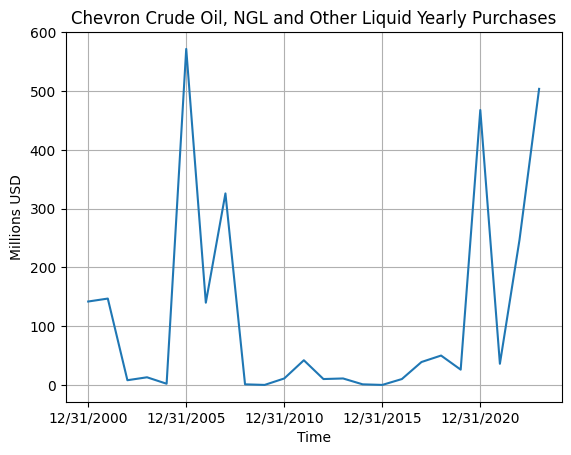

In [243]:
x = cvx["12 Months Ending"]
ycvx = cvx["OIL_PURCHASES_WORLD"]

plt.plot(x,ycvx)
plt.xlabel("Time")
plt.ylabel("Millions USD")
plt.title("Chevron Crude Oil, NGL and Other Liquid Yearly Purchases")
plt.xticks(ticks=x[::5])
plt.grid(True)
plt.show()

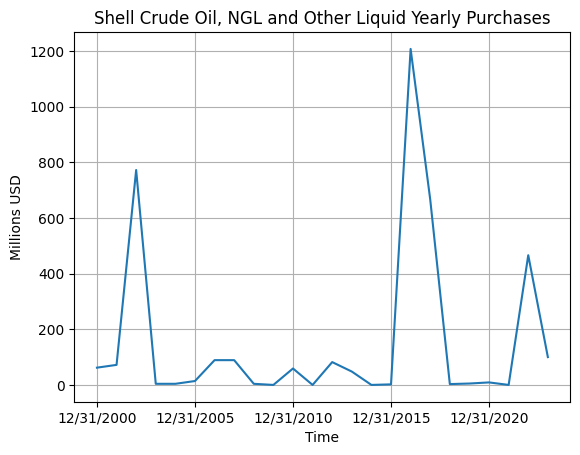

In [244]:
shell = pd.read_csv("./shell.csv")
shell.dropna()
x = shell["12 Months Ending"]
yshell = shell["OIL_PURCHASES_WORLD"]

plt.plot(x,yshell)
plt.xlabel("Time")
plt.ylabel("Millions USD")
plt.title("Shell Crude Oil, NGL and Other Liquid Yearly Purchases")
plt.xticks(ticks=x[::5])
plt.grid(True)
plt.show()

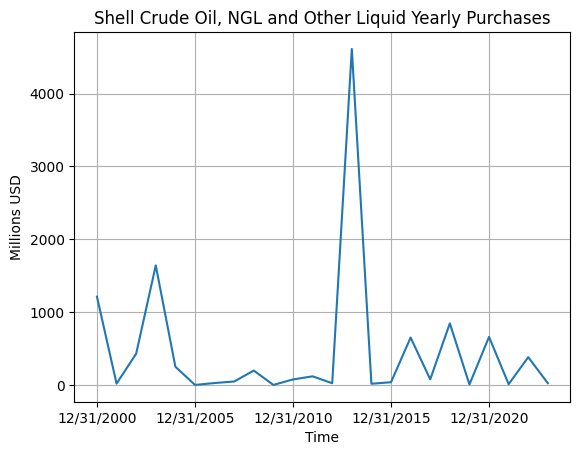

In [245]:
bp = pd.read_csv("./bp.csv")
x = bp["12 Months Ending"]
ybp = bp["OIL_PURCHASES_WORLD"]

plt.plot(x,ybp)
plt.xlabel("Time")
plt.ylabel("Millions USD")
plt.title("Shell Crude Oil, NGL and Other Liquid Yearly Purchases")
plt.xticks(ticks=x[::5])
plt.grid(True)
plt.show()

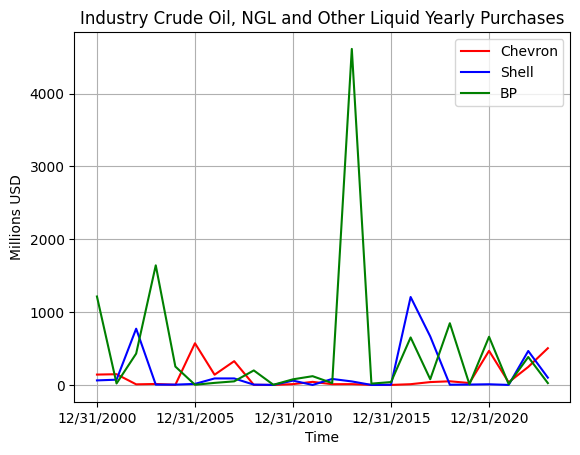

In [247]:
plt.plot(x, ycvx, 'r',label = 'Chevron')
plt.plot(x, yshell, 'b',label = 'Shell')
plt.plot(x, ybp, 'g',label = 'BP')
plt.xlabel("Time")
plt.ylabel("Millions USD")
plt.title("Industry Crude Oil, NGL and Other Liquid Yearly Purchases")
plt.xticks(ticks=x[::5])
plt.grid(True)
plt.legend()
plt.show()

### lets analyze the correlations between variables, starting w cvx

In [258]:
filtered_cvx =cvx.select_dtypes(include=['number'])
filtered_cvx =cvx.select_dtypes(include=['number'])
# filtered_cvx=filtered_cvx.drop('OIL_PURCHASES_WORLD',axis = 1)

correlation_matrix = filtered_cvx.corr(method='spearman')
correlation_matrix

,OIL_PURCHASES_WORLD,SALES_REV_TURN,OIL_PRODUCTION_BPD,BS_CASH_NEAR_CASH_ITEM,BS_INVENTORIES,Next_Q_OIL_PURCHASES_WORLD
OIL_PURCHASES_WORLD,1.000000,0.043081,0.031556,-0.203220,-0.091384,0.304950
SALES_REV_TURN,0.043081,1.000000,-0.397913,0.778261,0.541739,-0.189911
OIL_PRODUCTION_BPD,0.031556,-0.397913,1.000000,-0.334855,-0.580126,-0.062330
BS_CASH_NEAR_CASH_ITEM,-0.203220,0.778261,-0.334855,1.000000,0.506957,-0.097923
BS_INVENTORIES,-0.091384,0.541739,-0.580126,0.506957,1.000000,-0.120178
Next_Q_OIL_PURCHASES_WORLD,0.304950,-0.189911,-0.062330,-0.097923,-0.120178,1.000000


low correlation w variables and next year purchases

In [256]:
filtered_shell =shell.select_dtypes(include=['number'])
filtered_shell =shell.select_dtypes(include=['number'])
# filtered_shell=filtered_shell.drop('OIL_PURCHASES_WORLD',axis = 1)

correlation_matrix = filtered_shell.corr(method='spearman')
correlation_matrix

,SALES_REV_TURN,OIL_PRODUCTION_BPD,BS_CASH_NEAR_CASH_ITEM,BS_INVENTORIES,Next_Q_OIL_PURCHASES_WORLD
SALES_REV_TURN,1.000000,-0.614481,0.280870,0.658261,-0.313416
OIL_PRODUCTION_BPD,-0.614481,1.000000,-0.723636,-0.595347,0.057788
BS_CASH_NEAR_CASH_ITEM,0.280870,-0.723636,1.000000,0.389565,0.075875
BS_INVENTORIES,0.658261,-0.595347,0.389565,1.000000,-0.084801
Next_Q_OIL_PURCHASES_WORLD,-0.313416,0.057788,0.075875,-0.084801,1.000000


again low correlation w variables and next year purchases

In [257]:
filtered_bp =bp.select_dtypes(include=['number'])
filtered_bp =bp.select_dtypes(include=['number'])
# filtered_bp=filtered_bp.drop('OIL_PURCHASES_WORLD',axis = 1)

correlation_matrix = filtered_bp.corr(method='spearman')
correlation_matrix

,SALES_REV_TURN,OIL_PRODUCTION_BPD,BS_CASH_NEAR_CASH_ITEM,BS_INVENTORIES,Next_Q_OIL_PURCHASES_WORLD
SALES_REV_TURN,1.000000,0.338261,0.082609,0.600000,-0.124073
OIL_PRODUCTION_BPD,0.338261,1.000000,-0.466957,0.110435,-0.234800
BS_CASH_NEAR_CASH_ITEM,0.082609,-0.466957,1.000000,0.437391,0.042017
BS_INVENTORIES,0.600000,0.110435,0.437391,1.000000,0.042511
Next_Q_OIL_PURCHASES_WORLD,-0.124073,-0.234800,0.042017,0.042511,1.000000


linear,multiparam model

In [286]:
for df in [cvx, shell, bp]:
    # Drop rows where 'Next_Q_OIL_PURCHASES_WORLD' is NaN
    df_clean = df.dropna(subset=["Next_Q_OIL_PURCHASES_WORLD"])
    
    X = df_clean[["SALES_REV_TURN", "OIL_PRODUCTION_BPD", "BS_CASH_NEAR_CASH_ITEM", "BS_INVENTORIES"]]
    Y = df_clean["Next_Q_OIL_PURCHASES_WORLD"]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, )
    
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Predict and evaluate
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)


Mean Squared Error: 80170.58487049642
R^2 Score: -1.3801469484493203
Mean Squared Error: 119119.43607336024
R^2 Score: -2.912554263408913
Mean Squared Error: 684920.479719789
R^2 Score: -1.0570470652945576


Try Random forest regression model

In [297]:
for df in [cvx, shell, bp]:
    # Drop rows where 'Next_Q_OIL_PURCHASES_WORLD' is NaN
    df_clean = df.dropna(subset=["Next_Q_OIL_PURCHASES_WORLD"])
    
    # Features and Target
    X = df_clean[["SALES_REV_TURN", "OIL_PRODUCTION_BPD", "BS_CASH_NEAR_CASH_ITEM", "BS_INVENTORIES"]]
    Y = df_clean["Next_Q_OIL_PURCHASES_WORLD"]
    
    # Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Using RandomForestRegressor for more complex patterns
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, Y_train)

    # Predict and evaluate
    Y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)

Mean Squared Error: 27830.458980000003
R^2 Score: -8.386200179424224
Mean Squared Error: 283330.3867
R^2 Score: -0.2810330624809425
Mean Squared Error: 295892.09771999996
R^2 Score: -1.3184486188603741


Try gradient booster

In [303]:
for df in [cvx, shell, bp]:
    # Drop rows where 'Next_Q_OIL_PURCHASES_WORLD' is NaN
    df_clean = df.dropna(subset=["Next_Q_OIL_PURCHASES_WORLD"])
    
    X = df_clean[["SALES_REV_TURN", "OIL_PRODUCTION_BPD", "BS_CASH_NEAR_CASH_ITEM", "BS_INVENTORIES"]]
    Y = df_clean["Next_Q_OIL_PURCHASES_WORLD"]
    
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Initialize the Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    
    # Fit the model
    gbr_model.fit(X_train, Y_train)

    # Predict and evaluate
    Y_pred = gbr_model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)

Mean Squared Error: 28151.45850107752
R^2 Score: -8.494461626513477
Mean Squared Error: 380658.7667373477
R^2 Score: -0.7210877781001643
Mean Squared Error: 319591.9447607669
R^2 Score: -1.5041476559832376


Machine learning model

In [318]:
from xgboost import XGBRegressor

for df in [cvx, shell, bp]:
    # Drop rows where 'Next_Q_OIL_PURCHASES_WORLD' is NaN
    df_clean = df.dropna(subset=["Next_Q_OIL_PURCHASES_WORLD"])
    
    X = df_clean[["SALES_REV_TURN", "OIL_PRODUCTION_BPD", "BS_CASH_NEAR_CASH_ITEM", "BS_INVENTORIES"]]
    Y = df_clean["Next_Q_OIL_PURCHASES_WORLD"]
    
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    
    # Initialize the XGBoost Regressor
    xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.2, max_depth=3, random_state=8)
    
    # Fit the model
    xgb_model.fit(X_train, Y_train)

    # Predict and evaluate
    Y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)
    print("\n")

Mean Squared Error: 27808.926496408443
R^2 Score: -10.804267285110484


Mean Squared Error: 173938.04912889848
R^2 Score: 0.12824208691348893


Mean Squared Error: 3744438.8137744344
R^2 Score: -0.6067495563421681




Decision tree

In [324]:
for df in [cvx, shell, bp]:
    # Drop rows where 'Next_Q_OIL_PURCHASES_WORLD' is NaN
    df_clean = df.dropna(subset=["Next_Q_OIL_PURCHASES_WORLD"])
    
    X = df_clean[["SALES_REV_TURN", "OIL_PRODUCTION_BPD", "BS_CASH_NEAR_CASH_ITEM", "BS_INVENTORIES"]]
    Y = df_clean["Next_Q_OIL_PURCHASES_WORLD"]
    
    # Feature Engineering: Create polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Initialize the Decision Tree Regressor
    tree_model = DecisionTreeRegressor(random_state=3)
    
    # Implement cross-validation
    scores = cross_val_score(tree_model, X_poly, Y, cv=5, scoring='r2')
    
    # Fit the model on the entire dataset
    tree_model.fit(X_poly, Y)
    
    # Output the mean R^2 score from cross-validation
    print(f"Cross-validated R^2 scores: {scores}")
    print(f"Mean R^2 score: {scores.mean()}")

Cross-validated R^2 scores: [ 1.69159860e-01 -5.52465966e+00 -6.67188207e+02 -6.92090093e+02
 -2.47049465e+00]
Mean R^2 score: -273.420858826374
Cross-validated R^2 scores: [-11.83796052  -0.96845704  -1.87730747  -0.73567494 -21.35024372]
Mean R^2 score: -7.3539287369353445
Cross-validated R^2 scores: [ -0.4150164  -46.76129115  -0.17368816  -1.10771223  -0.829641  ]
Mean R^2 score: -9.857469789215205


All the models fail, let's try pooling the data and training a model on it

In [328]:
combined_df = pd.concat([cvx, shell, bp]).dropna(subset=["Next_Q_OIL_PURCHASES_WORLD"])

# Define the features and target variable
X = combined_df[["SALES_REV_TURN", "OIL_PRODUCTION_BPD", "BS_CASH_NEAR_CASH_ITEM", "BS_INVENTORIES"]]
Y = combined_df["Next_Q_OIL_PURCHASES_WORLD"]

# Split the combined data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=4)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Predict on the testing set
Y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Combined Model Evaluation:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Combined Model Evaluation:
Mean Squared Error: 155449.83543571428
R^2 Score: -1.1903212277607378
